### Exploratory Data Analysis Continued

After looking at each feature of the data set I want to draw attention to the target variable, Sale Price. Hopefully, better understanding the behavior of Sales Price data can provide clues to which type of features will be of best use as I turn to modeling. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../datasets/cleaned_housing_data.csv', keep_default_na=False, na_values=[''])
pd.options.display.max_columns = 99
df = df.drop(columns=['Unnamed: 0'])
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,60,RL,43.0,11492,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NA,NA,NA,0,4,2009,WD,220000
1,20,RL,68.0,7922,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NA,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NA,NA,NA,0,1,2010,WD,109000
2,60,RL,73.0,9802,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NA,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NA,NA,NA,0,4,2010,WD,174000
3,50,RL,82.0,14235,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NA,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NA,NA,NA,0,3,2010,WD,138500
4,20,RL,137.0,16492,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NAmes,PosA,Norm,1Fam,1Story,6,6,1966,2002,Gable,CompShg,BrkFace,Plywood,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,247.0,Rec,713.0,557.0,1517.0,GasA,Ex,Y,SBrkr,1888,0,0,1888,0.0,0.0,2,1,2,1,Gd,6,Mod,1,Gd,Attchd,1966.0,Fin,2.0,578.0,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,6,2010,WD,190000


In [3]:
df['SalePrice'].describe()

count      1592.000000
mean     184374.878141
std       82227.060136
min       12789.000000
25%      130000.000000
50%      163000.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

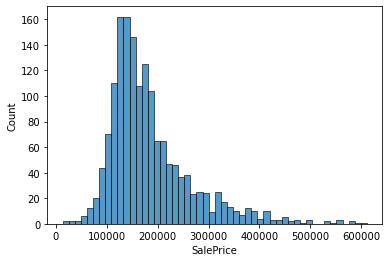

In [16]:
sns.histplot(df['SalePrice'], bins=50)

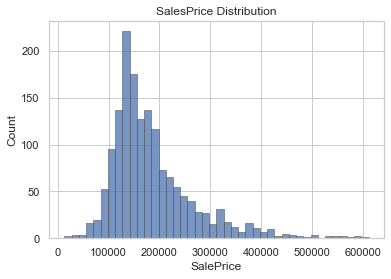

In [19]:
sns.set_theme(style='whitegrid')
sns.histplot(
    df,
    x="SalePrice",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
)
plt.title('SalesPrice Distribution');
plt.savefig('../images/PriceDistn.png')

In [6]:
df._get_numeric_data().corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False)

,SalePrice
SalePrice,1.000000
Overall Qual,0.808058
Gr Liv Area,0.705311
Garage Area,0.667333
Garage Cars,0.666759
Total Bsmt SF,0.639702
1st Flr SF,0.633325
Year Built,0.569933
Full Bath,0.553653
Garage Yr Blt,0.553122


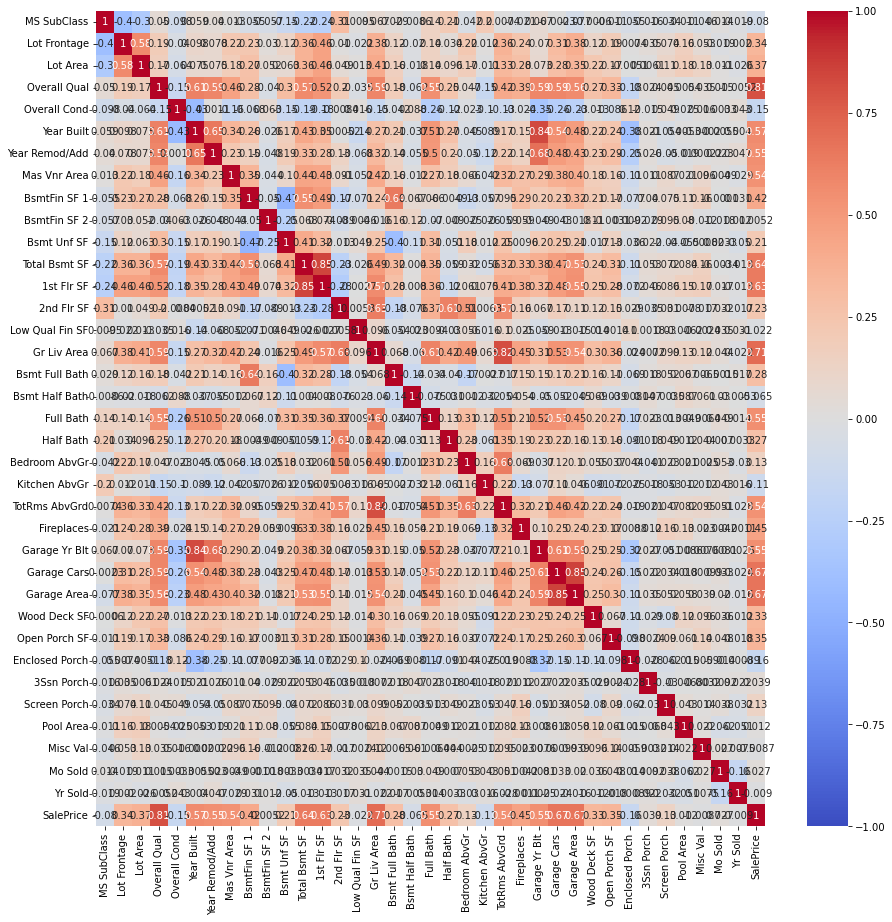

In [8]:
plt.figure(figsize = (15,15))
sns.heatmap(df._get_numeric_data().corr(), annot=True, vmin=-1 ,vmax=1, cmap='coolwarm');

In [13]:
features_A=['SalePrice', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Area']

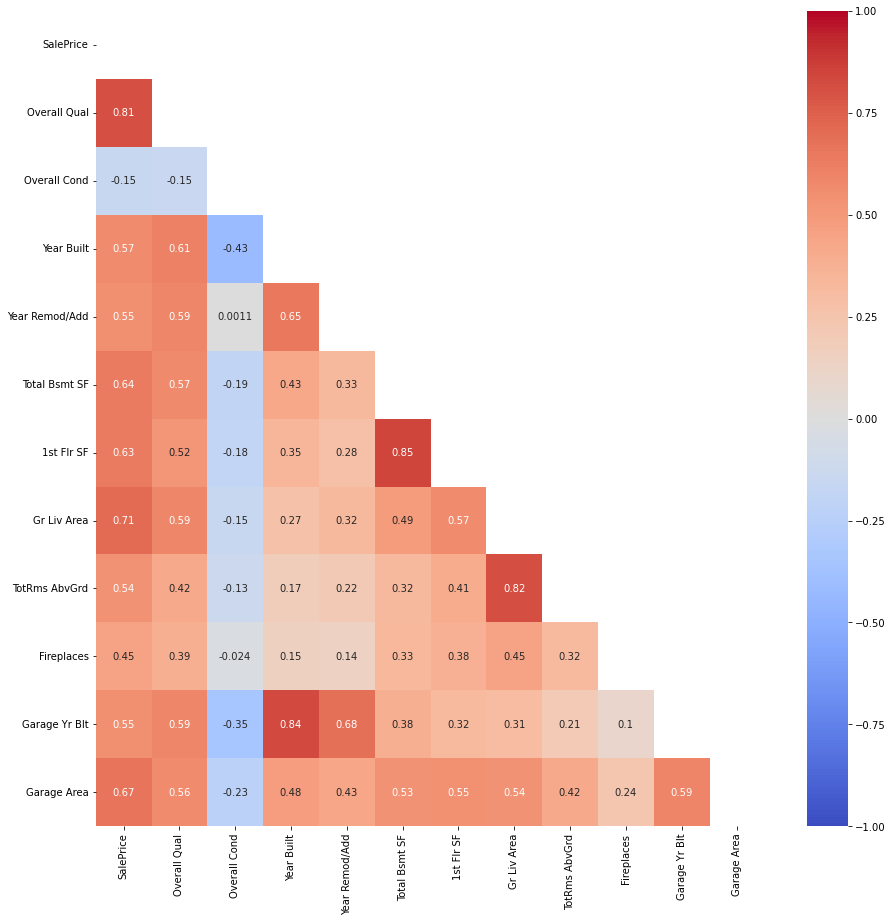

In [15]:
plt.figure(figsize = (15,15))
sns.heatmap(df[features_A].corr(), annot=True, vmin=-1 ,vmax=1, cmap='coolwarm', mask=np.triu(df[features_A].corr()));
plt.savefig('../images/Heatmap.png')